In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

In [5]:
def trajectory(theta,speed=20,height=0,dt=0.01,g=-9.81):
    vx=speed*cos(pi*theta/180)
    vz=speed*sin(pi*theta/180)    
    t,x,z=0,0,height
    ts,xs,zs=[t],[x],[z]
    while z>=0:
        t+=dt
        vz+=g*dt
        x+=vx*dt
        z+=vz*dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts,xs,zs

In [6]:
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices = []
            second = 0
            for i,t in enumerate(traj[0]):
                if t>= second:
                    second_indices.append(i)
                    second += 1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl = plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width , width * coords_height / coords_width)

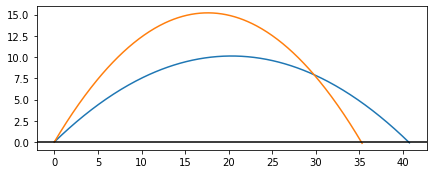

In [7]:
plot_trajectories(
    trajectory(45),
    trajectory(60)
)

In [8]:
def landing_position(traj):
    return traj[1][-1]

In [9]:
def hang_time(traj):
    return traj[0][-1]

In [10]:
def max_height(traj):
    return max(traj[2])

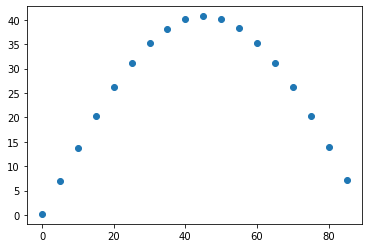

In [12]:
import matplotlib.pyplot as plt
angles=range(0,90,5)
landing_positions=[landing_position(trajectory(theta)) for theta in angles]
plt.scatter(angles,landing_positions)